In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import sys
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from proteus import Profiling,SpatialTools
from proteus import WaveTools as WT


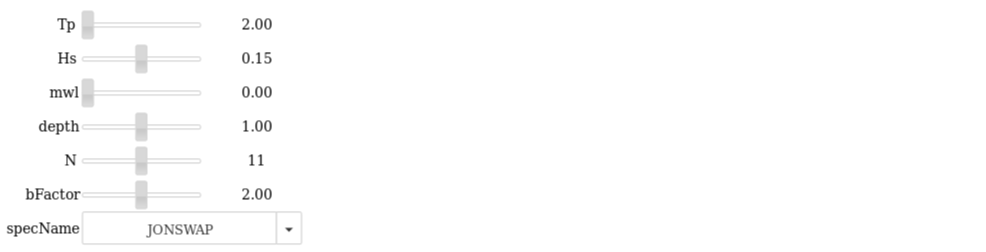

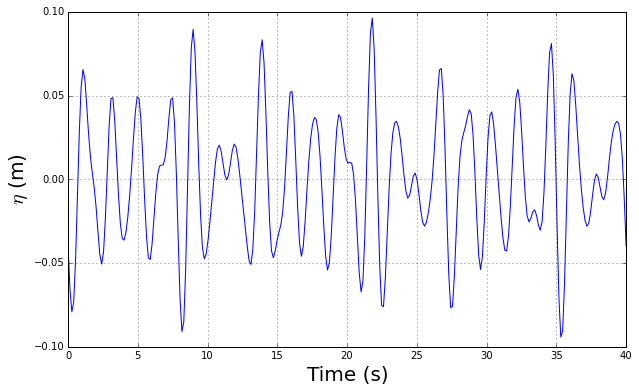

In [2]:
from proteus import Profiling,SpatialTools
from proteus import WaveTools as WT

def plotWaves(Tp = 2.,
              Hs = 0.15,
              mwl = 0.,
              depth = 1.,
              N = 11,
              bFactor = 2.0,
              specName="PM_mod"):
    waveDir = np.array([1., 2., 0.])
    spectral_params = None
    phi = None
    g = np.array([0., 0., -9.81])
    #Calling the class
    RW = WT.RandomWaves(Tp,
                        Hs,
                        mwl,
                        depth,
                        waveDir,
                        g,
                        N,
                        bFactor,
                        specName,
                        spectral_params,
                        phi)

    n=151
    xi = np.linspace(0, 20, n)
    yi = np.linspace(0, 20, n)
    zi = np.linspace(mwl-depth, mwl+2*Hs, n)
    nperiod = 20
    npoints = 15
    nn = npoints * nperiod
    tnlist=np.linspace(0,nperiod*Tp,nn)
    eta_t = np.zeros(len(tnlist),)
    psize =20

    #Calculating time series
    for i in range(len(tnlist)):
        x = [2., 0.5, 0.]
        t = tnlist[i]
        eta_t[i] = RW.eta(x, t)
    
        
    #Plotting time series
    plt.figure(2, figsize=(10,6), dpi=100);
    plt.xlim(0., nperiod*Tp)
    plt.plot(tnlist, eta_t)
    plt.xlabel("Time (s)", size=psize)
    plt.ylabel("$\eta$ (m)", size=psize)
    plt.grid()

interact(plotWaves,
         Tp = [2.,3.],
         Hs = 0.15,
         mwl = 0.,
         depth = 1.,
         N = 11,
         bandFactor = 2.0,
         specName=['JONSWAP', 'PM_mod']);